You are given a 0-indexed m x n integer matrix grid and an integer k. You are currently at position (0, 0) and you want to reach position (m - 1, n - 1) moving only down or right.

Return the number of paths where the sum of the elements on the path is divisible by k. Since the answer may be very large, return it modulo 109 + 7.

 

Example 1:

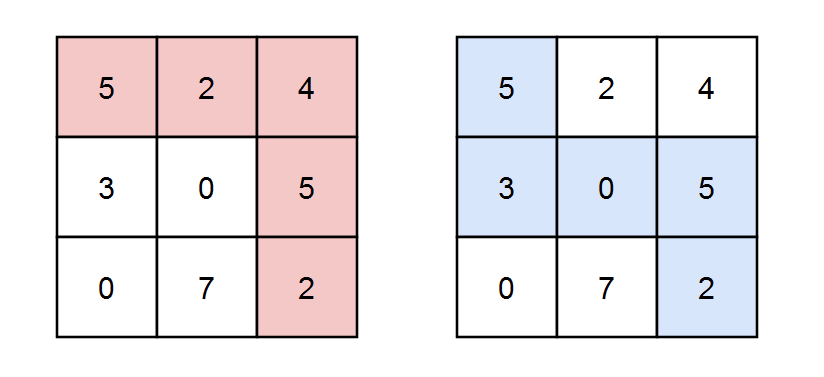

Input: grid = [[5,2,4],[3,0,5],[0,7,2]], k = 3
Output: 2
Explanation: There are two paths where the sum of the elements on the path is divisible by k.
The first path highlighted in red has a sum of 5 + 2 + 4 + 5 + 2 = 18 which is divisible by 3.
The second path highlighted in blue has a sum of 5 + 3 + 0 + 5 + 2 = 15 which is divisible by 3.

Example 2:

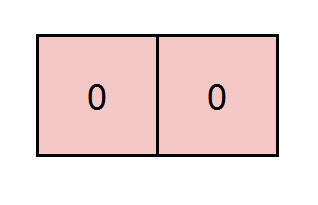

Input: grid = [[0,0]], k = 5
Output: 1
Explanation: The path highlighted in red has a sum of 0 + 0 = 0 which is divisible by 5.

Example 3:

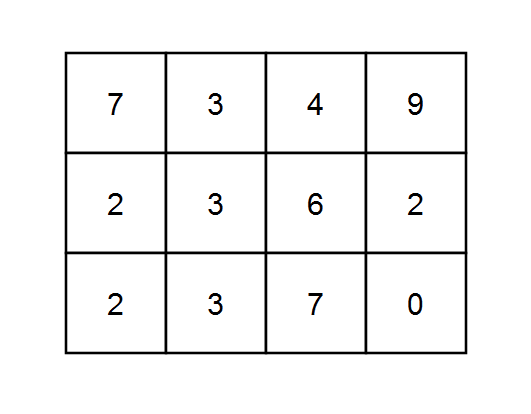

Input: grid = [[7,3,4,9],[2,3,6,2],[2,3,7,0]], k = 1
Output: 10
Explanation: Every integer is divisible by 1 so the sum of the elements on every possible path is divisible by k.

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 5 * 104
    1 <= m * n <= 5 * 104
    0 <= grid[i][j] <= 100
    1 <= k <= 50

 

In [ ]:
class Solution:
    def numberOfPaths(self, grid: List[List[int]], k: int) -> int:
        MOD = 10**9 + 7
        m, n = len(grid), len(grid[0])

        dp = [[[0] * k for _ in range(n + 1)] for _ in range(m + 1)]

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if i == 1 and j == 1:
                    dp[i][j][grid[0][0] % k] = 1
                    continue

                value = grid[i - 1][j - 1] % k
                for r in range(k):
                    prev_mod = (r - value + k) % k
                    dp[i][j][r] = (
                        dp[i - 1][j][prev_mod] + dp[i][j - 1][prev_mod]
                    ) % MOD

        return dp[m][n][0]

In [ ]:
class Solution:
    def numberOfPaths(self, grid: List[List[int]], k: int) -> int:
        MOD = 10**9 + 7
        m, n = len(grid), len(grid[0])

        dp = [[[0] * k for _ in range(n)] for _ in range(m)]

        for i in range(m):
            for j in range(n):
                if i == 0 and j == 0:
                    dp[i][j][grid[0][0] % k] = 1
                    continue

                value = grid[i][j]
                for r in range(k):
                    curr_r = (grid[i][j] + r) % k
                    if i - 1 >= 0:
                        dp[i][j][curr_r] += dp[i - 1][j][r]
                    if j - 1 >= 0:
                        dp[i][j][curr_r] += dp[i][j - 1][r]
                    dp[i][j][curr_r] = dp[i][j][curr_r] % MOD
        return dp[m - 1][n - 1][0] % MOD